In [1]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem.Descriptors import MolWt
from rdkit.Chem.rdMolDescriptors import CalcNumHBA, CalcNumHBD

df = pd.read_csv('prediction_results_globfeat.csv').sort_values(by=['CN'], ascending = True)
df

SMILES  Device_tier Train/Valid/Test  \
377           CC1=CC2=C(C=C1)C=C(C=C2)C            2            Train   
579             CC(C)C1=CC(=CC=C1)C(C)C            1             Test   
482                 CC(C)(C)C1=CC=CC=C1            3            Train   
331                CC1=CC=CC2=CC=CC=C12            1            Train   
424               CC1=C(C(=C(C=C1)C)C)C            2            Train   
..                                  ...          ...              ...   
380    CCCCCCCCC=CCCCCCCCC(=O)OCCCCCCCC            3            Train   
264                       CCCCCCOCCCCCC            1            Train   
474  CCCCCCCCCCOC(=O)CCCCCCCC=CCCCCCCCC            3            Train   
270                         CCCCCOCCCCC            1            Train   
441                               CCOCC            3            Train   

          CN   predicted                                        glob_vector  
377   -7.000   -6.966788  -0.040026 -0.468359 -1.712152 1.895249 -0.4909...  
579   -3.000    6.632534  0.431756 1.559555 -1.170707 -0.493688 0.503992...  
482   -1.000   -1.753992  -0.040978 0.024678 -0.956644 0.575048 -0.06232...  
331    0.000   -0.472756  0.096926 0.387355 -1.861869 0.859117 0.345680 ...  
424    1.000    0.776306  0.379311 0.977087 -1.255516 0.731544 0.475432 ...  
..       ...         ...                                                ...  
380  131.000  101.058600  5.652853 26.740696 -15.815073 -6.725697 5.6201...  
264  131.015  138.538570  9.017511 36.073757 -20.541838 -11.019506 7.983...  
474  134.000  109.294160  6.342606 29.196697 -17.013906 -7.017048 6.1364...  
270  142.000  143.649290  9.092175 36.986797 -21.243481 -11.694208 8.175...  
441  160.000  163.657120  7.745897 42.147724 -25.178757 -13.177505 8.292...  

[630 rows x 6 columns]

# 5b

In [2]:
def Tanimoto(vec1, vec2):
    C = np.sum( vec1 * vec2 )
    A = np.sum( vec1 * vec1 )
    B = np.sum( vec2 * vec2 )
    S = C / (A + B - C)
    
    return 1.0-S

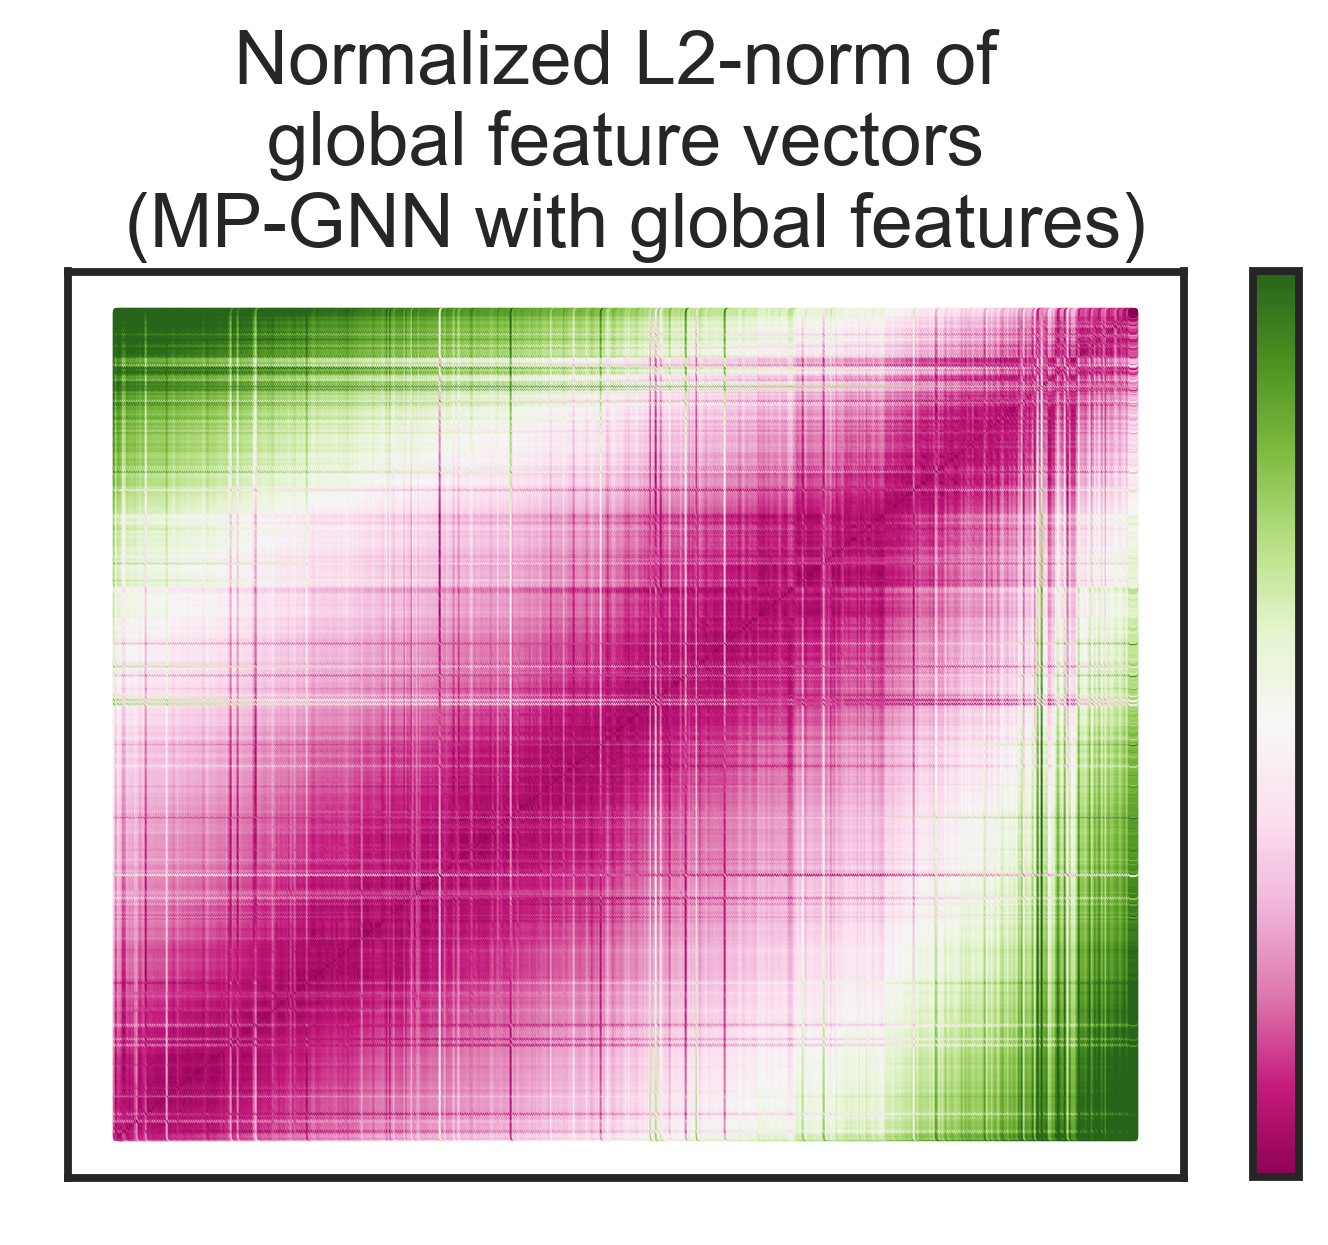

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(context='talk', style='ticks',
        color_codes=True, rc={'legend.frameon': False})
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.dpi'] = 300
plt.rcParams["font.family"] = 'Arial'
#plt.rcParams.update({'font.size': 24})
plt.rcParams.update({'font.size': 12})

df = df[df.CN < 85]

glob_vector_array = [np.array([ float(y) for y in x.split()]) for x in list(df.glob_vector)]

cn = list(df.CN)

X = []
Y = []
c = []

for i in range(len(glob_vector_array)):
    for j in range(len(glob_vector_array)):
        X.append(i)
        Y.append(j)
        #X.append(cn[i])
        #Y.append(cn[j])
        c.append( np.linalg.norm(glob_vector_array[i] - glob_vector_array[j], 2)  )
        #c.append( Tanimoto(glob_vector_array[i], glob_vector_array[j])  )
        
c = np.array(c) / max(c)
#c = (np.array(c) - np.mean(c)) / np.std(c)


sc = plt.scatter(X, Y, c=c, s=1, cmap='PiYG', marker='s', vmin = 0.0, vmax = 0.7)
plt.title('Normalized L2-norm of \n global feature vectors \n (MP-GNN with global features)')
plt.xticks([])
plt.yticks([])
plt.colorbar(sc, ticks=[])
plt.show()

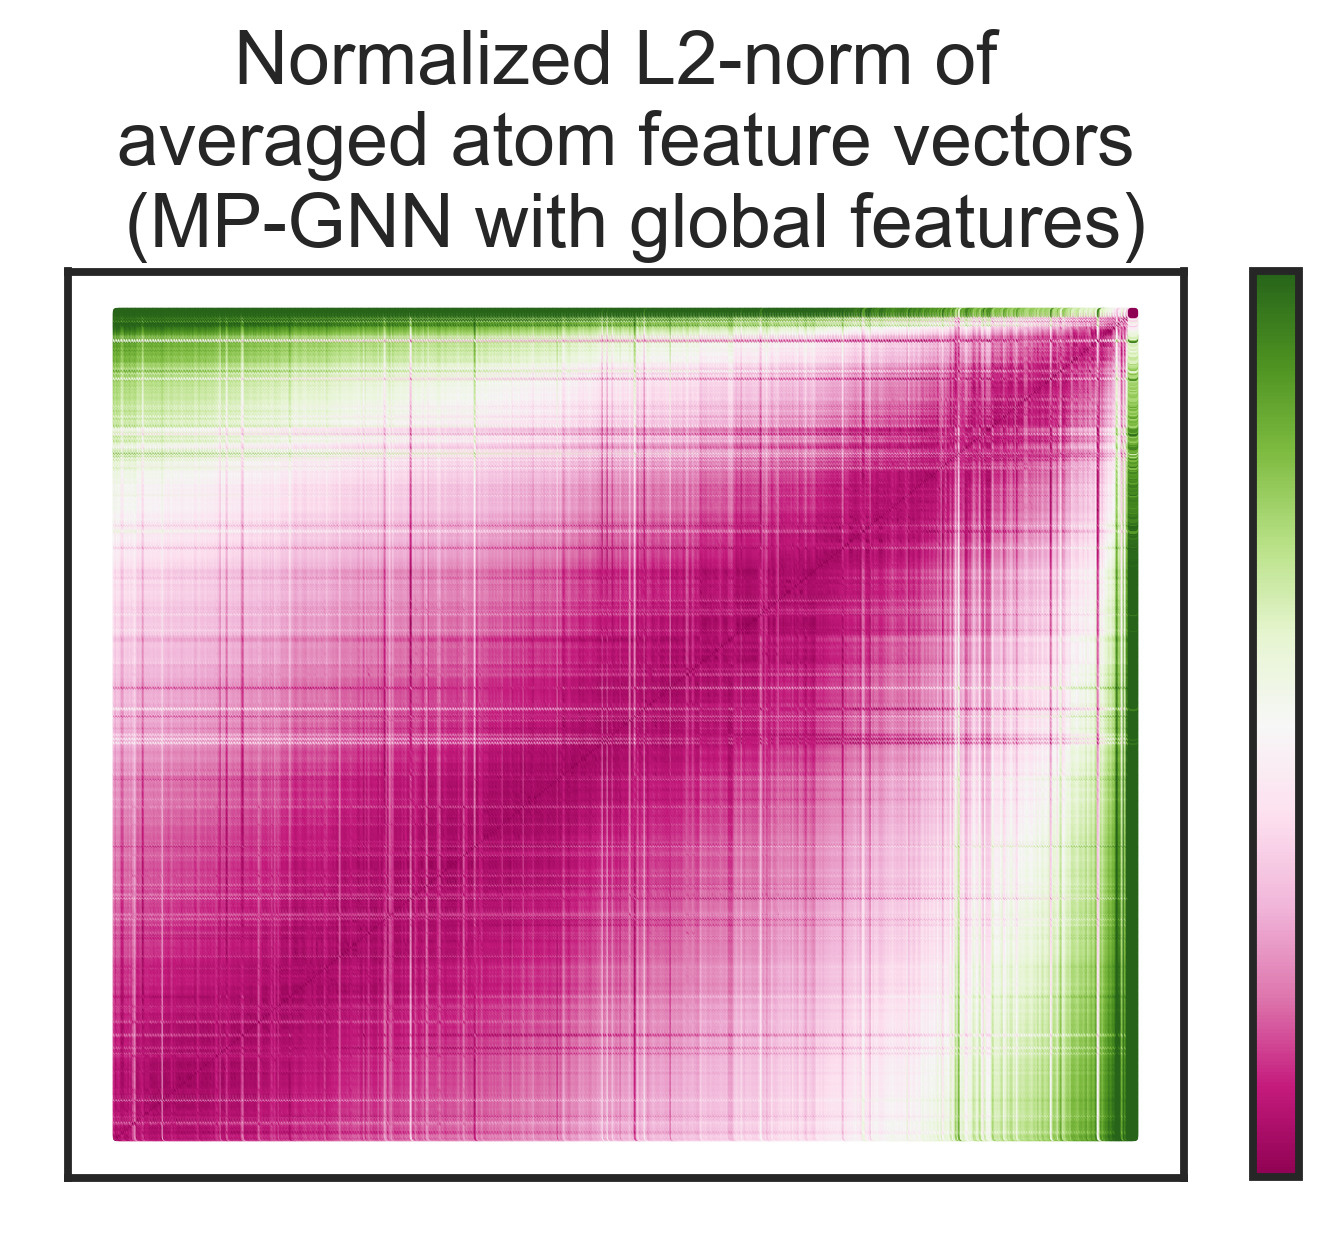

In [4]:
df2 = pd.read_csv('prediction_results_avg_atom_feat.csv').sort_values(by=['CN'], ascending = True)
glob_vector_array = [np.array([ float(y) for y in x.split()]) for x in list(df2.glob_vector)]

df2 = df2[df2.CN < 85]

cn = list(df2.CN)

X = []
Y = []
c = []

for i in range(len(glob_vector_array)):
    for j in range(len(glob_vector_array)):
        X.append(i)
        Y.append(j)
        #X.append(cn[i])
        #Y.append(cn[j])
        c.append( np.linalg.norm(glob_vector_array[i] - glob_vector_array[j], 2)  )
        #c.append( Tanimoto(glob_vector_array[i], glob_vector_array[j])  )

c = np.array(c) / max(c)
        
sc = plt.scatter(X, Y, c=c, s=1, cmap='PiYG', marker='s', vmin = 0.0, vmax = 0.7)
#plt.colorbar(sc)
plt.title('Normalized L2-norm of \n averaged atom feature vectors \n (MP-GNN with global features)')
plt.xticks([])
plt.yticks([])
plt.colorbar(sc, ticks=[])
plt.show()

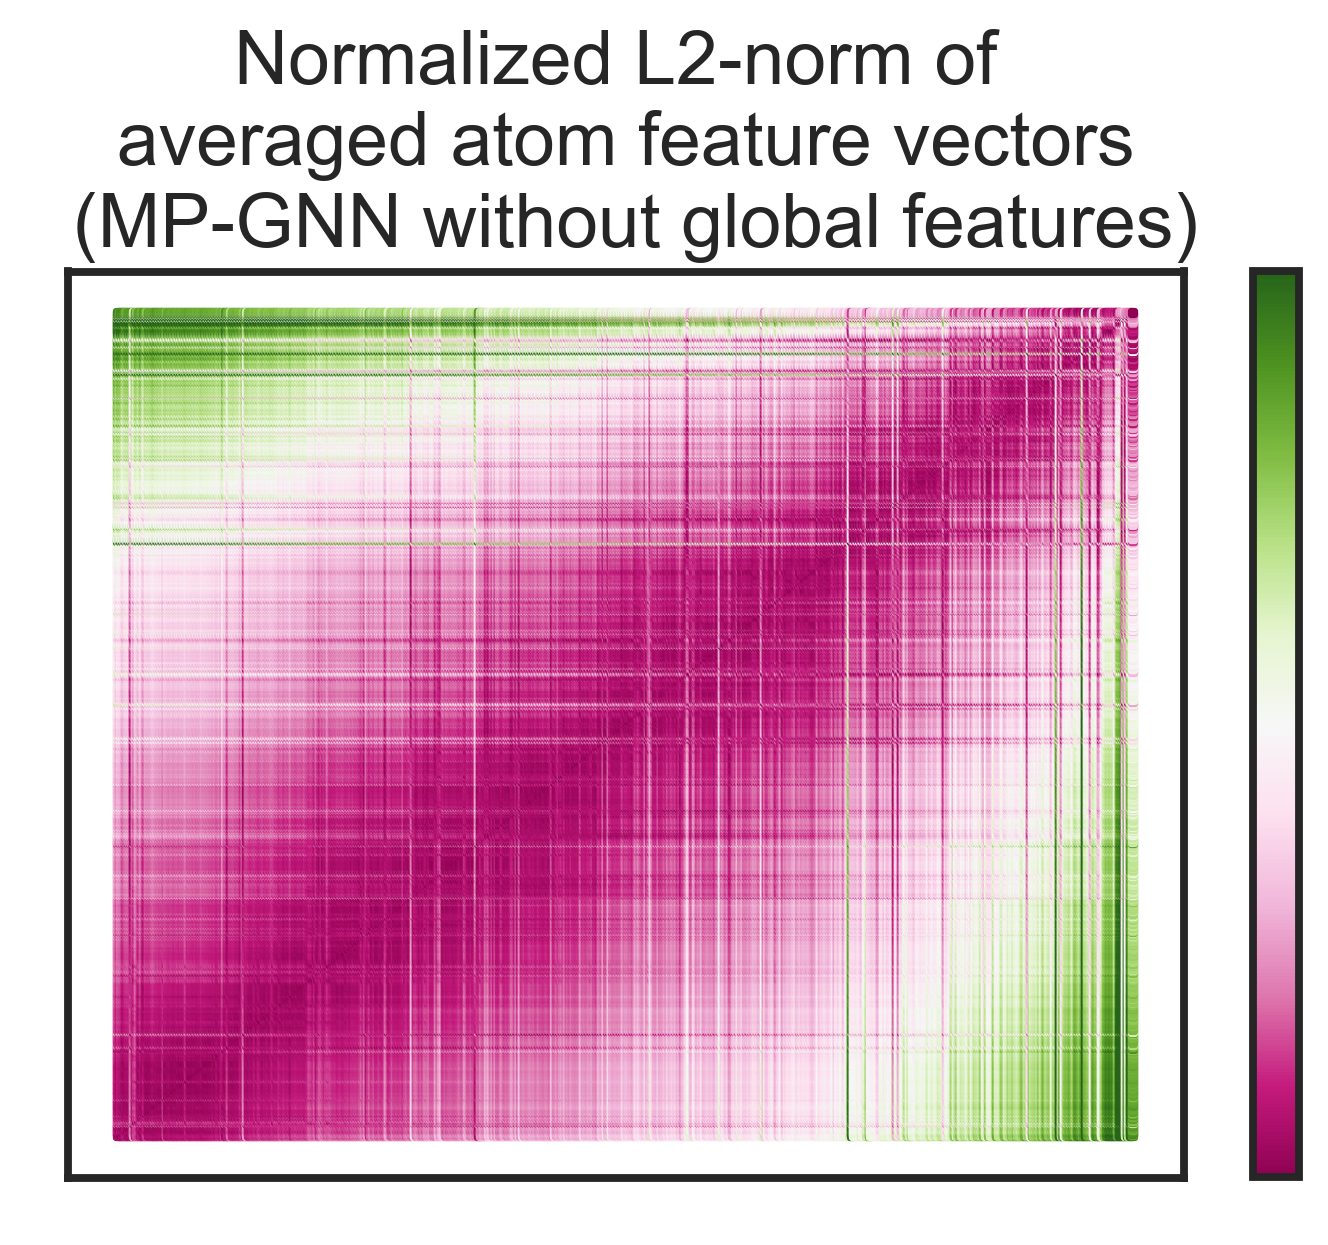

In [5]:
df2 = pd.read_csv('prediction_results_noglob_avg_atom_feat.csv').sort_values(by=['CN'], ascending = True)
glob_vector_array = [np.array([ float(y) for y in x.split()]) for x in list(df2.glob_vector)]
df2 = df2[df2.CN < 85]

cn = list(df2.CN)

X = []
Y = []
c = []

for i in range(len(glob_vector_array)):
    for j in range(len(glob_vector_array)):
        X.append(i)
        Y.append(j)
        #X.append(cn[i])
        #Y.append(cn[j])
        c.append( np.linalg.norm(glob_vector_array[i] - glob_vector_array[j], 2)  )
        #c.append( Tanimoto(glob_vector_array[i], glob_vector_array[j])  )

c = np.array(c) / max(c)
plt.title('Normalized L2-norm of \n averaged atom feature vectors \n (MP-GNN without global features)')
plt.xticks([])
plt.yticks([])

sc = plt.scatter(X, Y, c=c, s=1, cmap='PiYG', marker='s', vmin = 0.0, vmax = 0.7)
#plt.colorbar(sc)
plt.colorbar(sc, ticks=[])
plt.show()

# 5a

In [6]:
import rdkit
def atom_type(smi, a_ind):
    mol = rdkit.Chem.MolFromSmiles(smi)
        
    atom = mol.GetAtomWithIdx(a_ind)    
    
    atom_type = ''
    atom_type += atom.GetSymbol()

    num_bonds = atom.GetDegree() + atom.GetTotalNumHs()

    if atom.GetSymbol() == 'C':
        if num_bonds == 4:
            atom_type += 'sp3'
        elif num_bonds == 3:
            atom_type += 'sp2'
        elif num_bonds <= 2:
            atom_type += 'sp'
    elif atom.GetSymbol() == 'O':
        if num_bonds == 2:
            if atom.GetTotalNumHs() == 1:
                atom_type += '-H'
            else:
                atom_type = '-O-'
        elif num_bonds == 1:
            atom_type += 'sp2'
        else:
            print("?!?!?!")

    if atom.GetSymbol() == 'C':
        if atom.GetIsAromatic():
            atom_type += '(aro)'
        elif atom.IsInRing():
            atom_type += '(ring)'    
    elif atom.GetSymbol() == 'O':
        if atom.GetIsAromatic():
            atom_type = 'O(aro)'
        elif atom.IsInRing():
            atom_type = 'O(ring)'

    if atom_type == 'Csp(aro)':
        atom_type = 'C(ring)'
    elif atom_type == 'Csp2(aro)':
        atom_type = 'C(aro)'
    elif atom_type == 'Osp3(aro)':
        atom_type = 'O(aro)'

    if atom_type == 'Csp(ring)' or atom_type == 'Csp2(ring)' or atom_type == 'Csp3(ring)':
        atom_type = 'C(ring)'

    if atom_type == 'Osp3':
        atom_type = '-O-'
    if atom_type == 'Osp2':
        atom_type = 'O='
    if atom_type == 'Osp3(ring)':
        atom_type = 'O(ring)'
        
    return atom_type

In [7]:
df_atom_noglob = pd.read_csv('each_atom_feature_noglob.csv')
df_atom_glob = pd.read_csv('each_atom_feature_glob.csv')

In [8]:
df_atom_noglob['atom_type'] = [atom_type( row['smiles'], row['atom_index']) for _, row in df_atom_noglob.iterrows() ]
df_atom_glob['atom_type'] = [atom_type( row['smiles'], row['atom_index']) for _, row in df_atom_glob.iterrows() ]

In [9]:
atom_features_noglob = []
atom_features_noglob_O_only = []
for _, row in df_atom_noglob.iterrows():
    atom_features_noglob.append([float(x) for x in row['atom_feature'].split()])
    
    if 'O' in row['atom_type']:
        atom_features_noglob_O_only.append([float(x) for x in row['atom_feature'].split()])
    
atom_features_glob = []
atom_features_glob_O_only = []
for _, row in df_atom_glob.iterrows():
    atom_features_glob.append([float(x) for x in row['atom_feature'].split()])

    if 'O' in row['atom_type']:
        atom_features_glob_O_only.append([float(x) for x in row['atom_feature'].split()])
        
atom_features_noglob = np.array(atom_features_noglob)
atom_features_noglob_O_only = np.array(atom_features_noglob_O_only)
atom_features_glob = np.array(atom_features_glob)
atom_features_glob_O_only = np.array(atom_features_glob_O_only)

In [10]:
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE
pipe = Pipeline(steps=(
    ('PCA', PCA(n_components=10)),
    ('TSNE', TSNE(n_components=2))
))

In [11]:
xt_noglob = pipe.fit_transform(atom_features_noglob)
xt_noglob_O_only = pipe.fit_transform(atom_features_noglob_O_only)
xt_glob = pipe.fit_transform(atom_features_glob)
xt_glob_O_only = pipe.fit_transform(atom_features_glob_O_only)

-89.48101 96.02696
-90.71567 102.396484


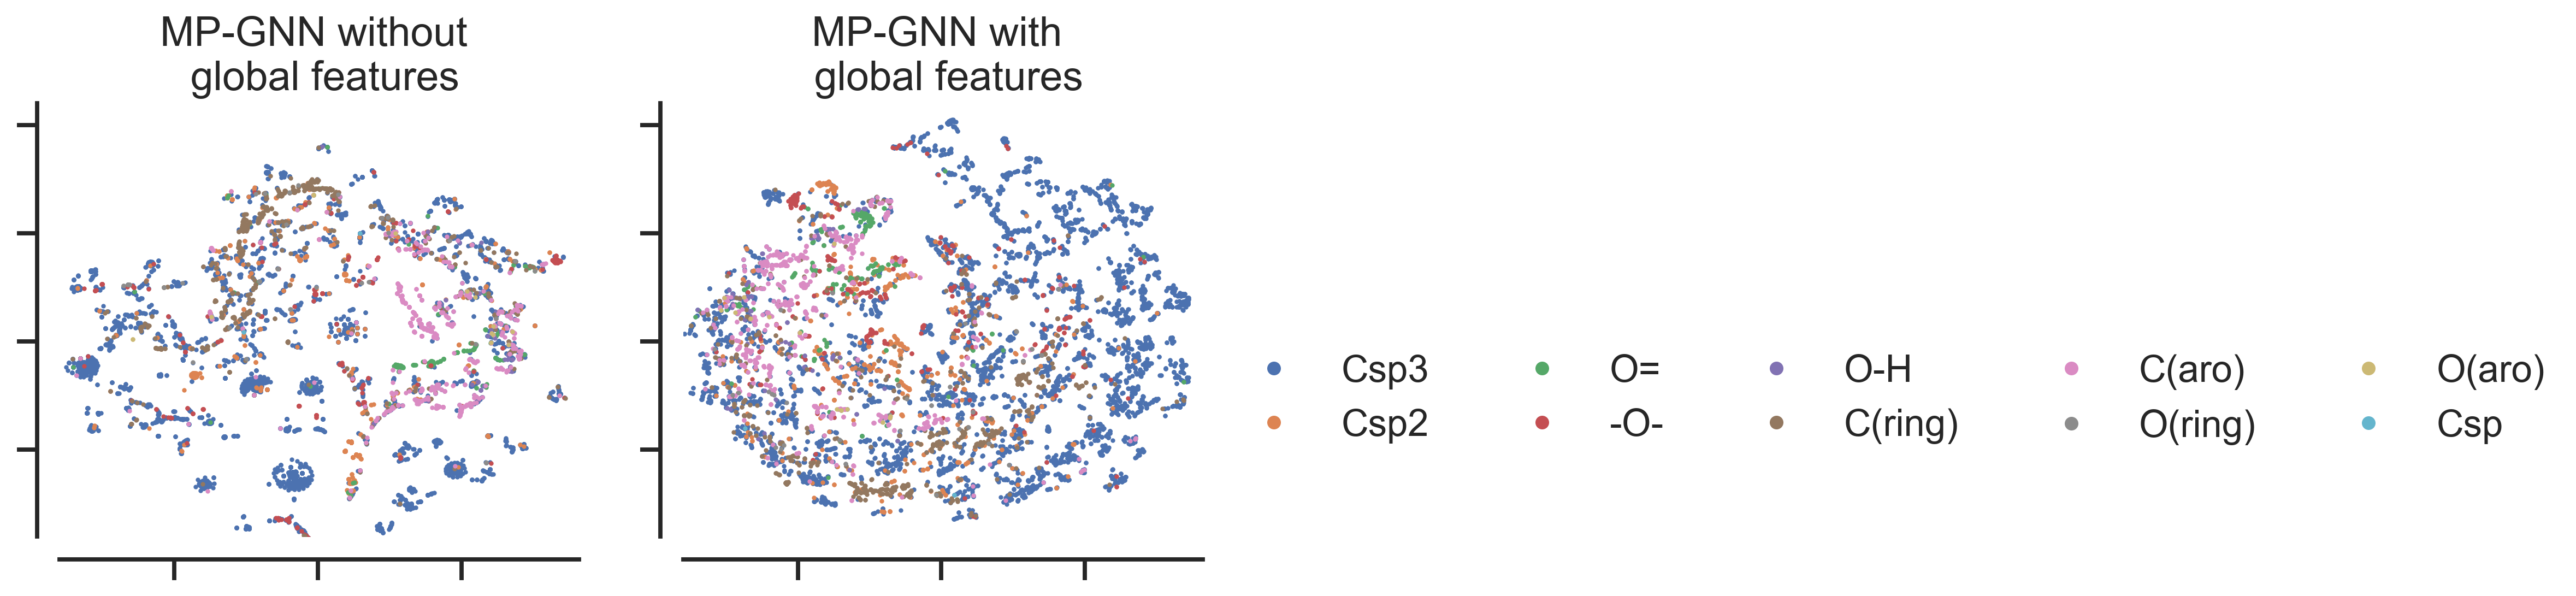

In [12]:
fig, axmatrix = plt.subplots(ncols=2, figsize=(9,3.5), sharex=True, sharey=True)

atom_types_list = list(df_atom_noglob.atom_type)
types_to_plot = ['Csp3', 'Csp2', 'O=', '-O-', 'O-H', 'C(ring)', 'C(aro)', 'O(ring)', 'O(aro)', 'Csp']
#types_to_plot = [ '-O-', 'O-H', 'O(aro)', 'O(ring)',  'O=']
#types_to_plot = [ 'O-H']

print( min(min(xt_noglob[:,0]),min(xt_glob[:,0])), max(max(xt_noglob[:,0]),max(xt_glob[:,0])) )
print( min(min(xt_noglob[:,1]),min(xt_glob[:,1])), max(max(xt_noglob[:,1]),max(xt_glob[:,1])) )

for atom_type in types_to_plot:
    atom_indices_to_plot = [ i for i, j in enumerate(atom_types_list) if j == atom_type ]
    
    xt_noglob_plot = xt_noglob[atom_indices_to_plot]
    xt_glob_plot = xt_glob[atom_indices_to_plot]

    axmatrix[0].plot(xt_noglob_plot[:,0], xt_noglob_plot[:,1],\
                      '.', ms=2, zorder=-1)

    axmatrix[1].plot(xt_glob_plot[:,0], xt_glob_plot[:,1],\
                      '.', ms=2, label = atom_type, zorder=-1)
    

sns.despine(offset=10)

axmatrix[0].set_title('MP-GNN without \n global features')
axmatrix[1].set_title('MP-GNN with \n global features')


for i in range(2):
    axmatrix[i].set_xlim([-90, 91])
    axmatrix[i].set_ylim([-90, 110])
    axmatrix[i].set_rasterization_zorder(0)

for ax in axmatrix:
    #ax.set_xlabel('PC 1')
    #ax.set_ylabel('PC 2')
    ax.set_xticklabels([])
    ax.set_yticklabels([])

   
leg = axmatrix[1].legend(loc='best', bbox_to_anchor=(1., 0.5), markerscale=5, ncol=5)
#plt.tight_layout()

# 5c and 5d

In [13]:
df_globfeat_tsne = pd.read_csv('glob_vec_tsne.csv')
df_for_CN = pd.read_csv('prediction_results_globfeat.csv')
df_for_CN['Canonical SMILES'] = [Chem.MolToSmiles(Chem.MolFromSmiles(smi)) for smi in df_for_CN.SMILES]

for _, row in df_for_CN.iterrows():
    df_globfeat_tsne.loc[( df_globfeat_tsne['Canonical SMILES'] == row['Canonical SMILES']  ),'CN'] = row['CN']
    df_globfeat_tsne.loc[( df_globfeat_tsne['Canonical SMILES'] == row['Canonical SMILES']  ),'predicted'] = row['predicted']

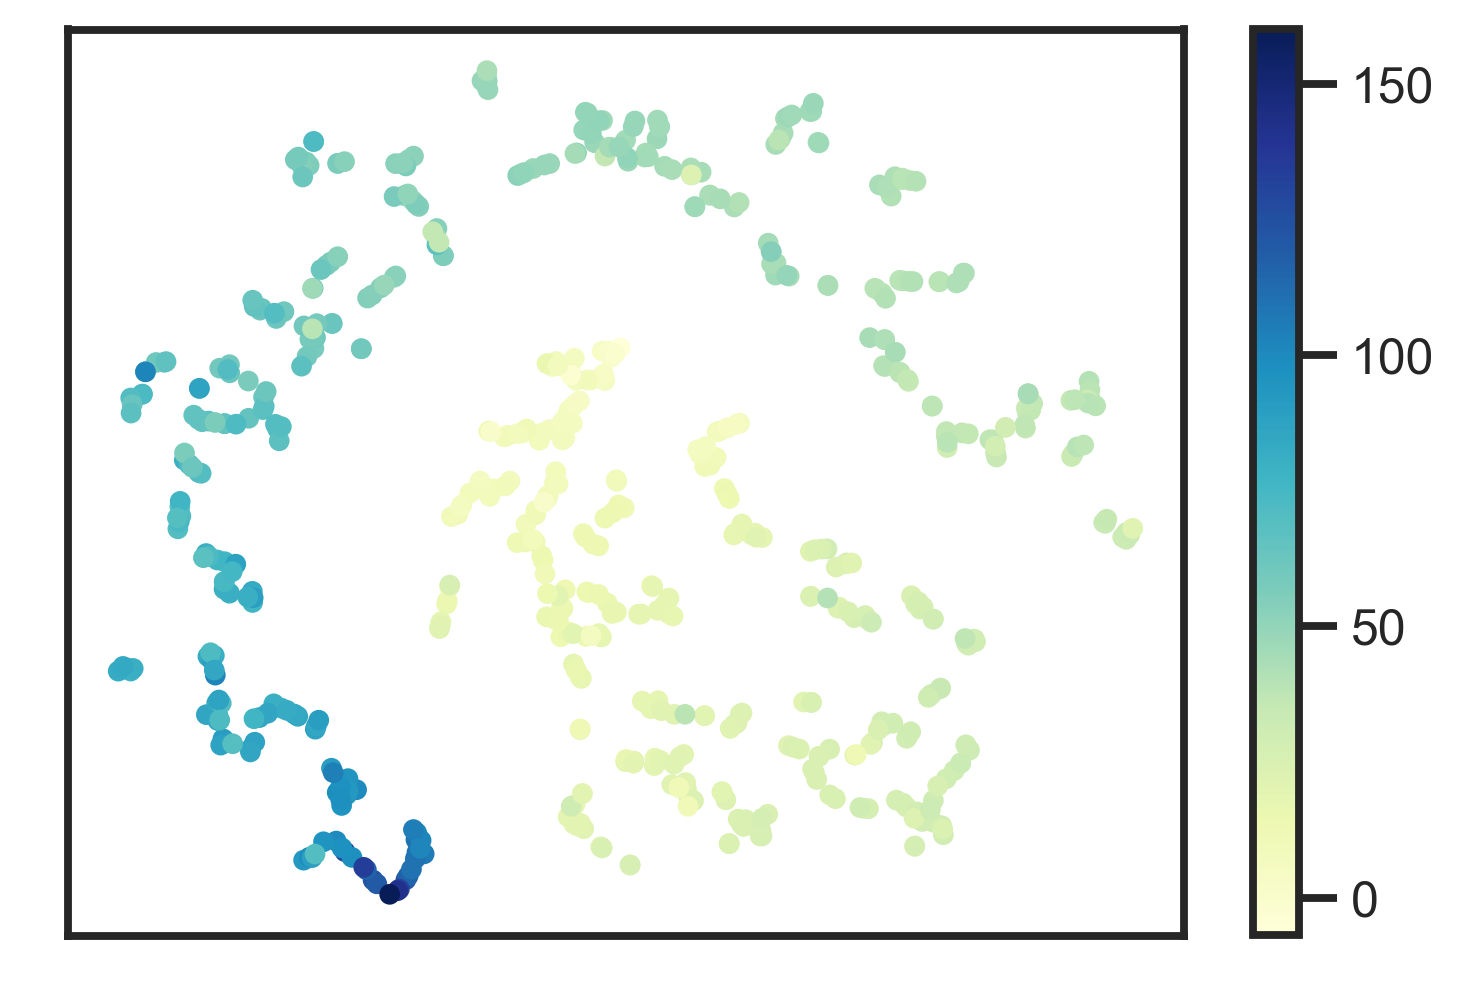

In [14]:
sc = plt.scatter(df_globfeat_tsne.X, df_globfeat_tsne.Y, c=df_globfeat_tsne.CN, s=12, cmap='YlGnBu')
cb = plt.colorbar(sc, ticks=np.arange(0,150.01,50))
cb.ax.tick_params(labelsize=12)
plt.xticks([])
plt.yticks([])

plt.show()

In [15]:
df_globfeat_tsne['Nc'] = [  [atom.GetSymbol() for atom in Chem.MolFromSmiles(smi).GetAtoms()].count('C') \
                                          for smi in df_globfeat_tsne['Canonical SMILES']  ]

In [16]:
for n_c, sub_df in df_globfeat_tsne.groupby('Nc'):
    print(n_c, len(sub_df))

1 1
2 2
3 4
4 17
5 28
6 36
7 49
8 67
9 39
10 59
11 18
12 37
13 18
14 31
15 25
16 26
17 12
18 36
19 22
20 25
21 21
22 19
23 5
24 12
25 4
26 11
28 2
34 1
36 1
38 2


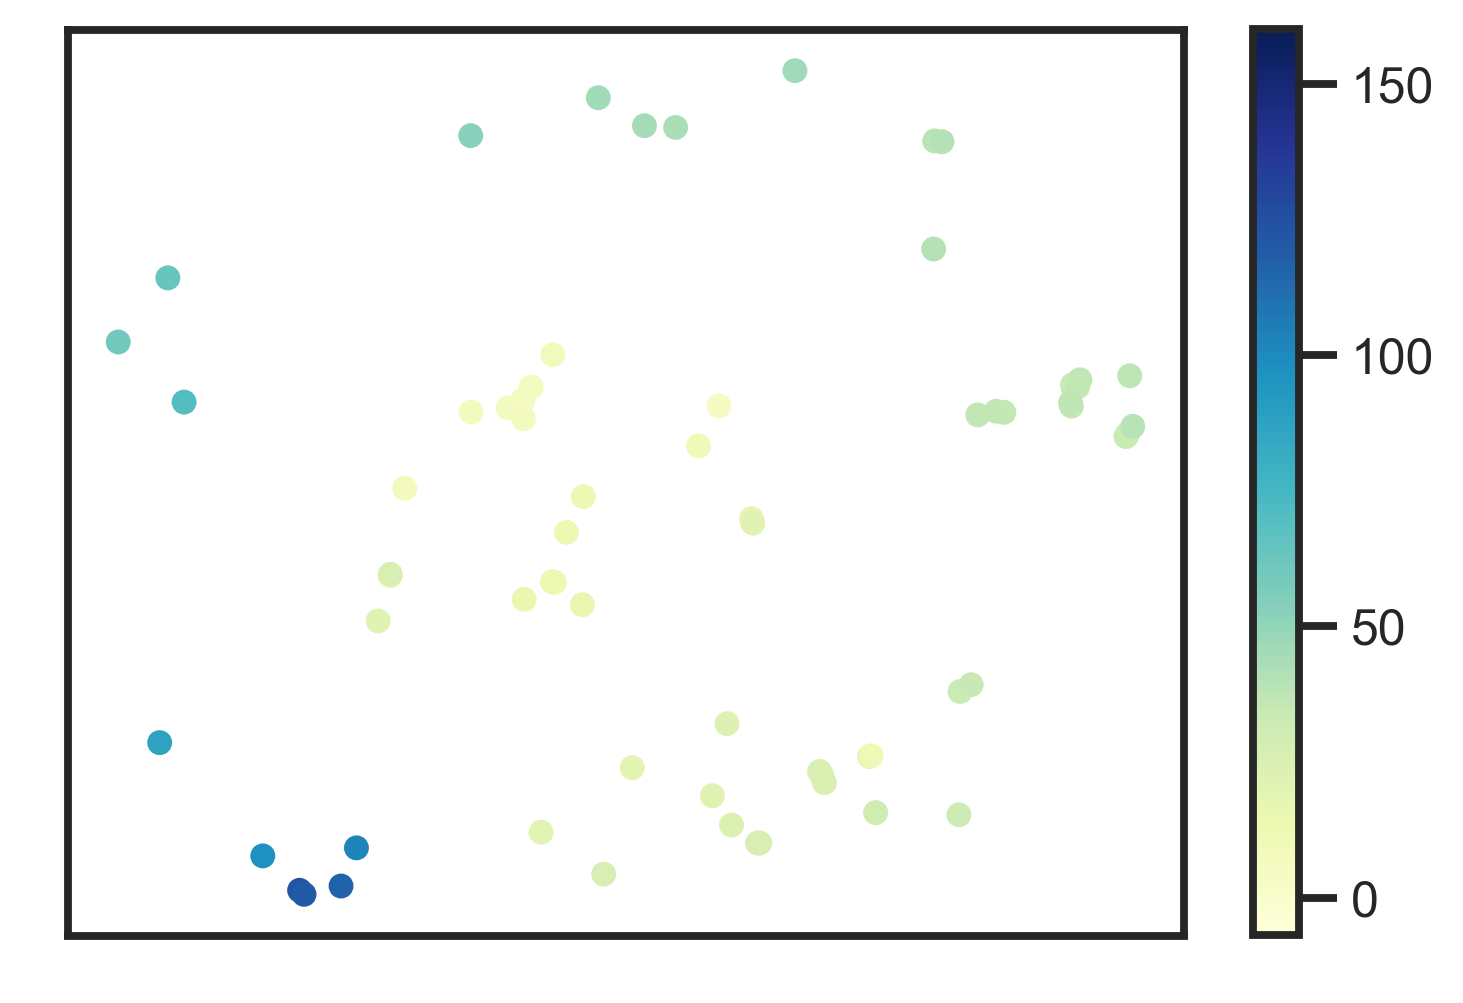

In [17]:
df_globfeat_tsne_plot = df_globfeat_tsne[df_globfeat_tsne.Nc == 8]
plt.xticks([])
plt.yticks([])
#plt.title('tsne glob feat')
#plt.xticks(np.arange(-100,100.01,10))
#plt.yticks(np.arange(-100,100.01,10))

sc = plt.scatter(df_globfeat_tsne_plot.X, df_globfeat_tsne_plot.Y, c=df_globfeat_tsne_plot.CN, s=20, cmap='YlGnBu')
#plt.colorbar(sc)
cb = plt.colorbar(sc, ticks=np.arange(0,150.01,50))
cb.ax.tick_params(labelsize=12)
plt.clim(-7,160)
#plt.grid()
#plt.plot([min(df_globfeat_tsne_plot.X),max(df_globfeat_tsne_plot.X)],[-25,-25], linewidth=1, c='black')
#plt.plot([-25,-25], [min(df_globfeat_tsne_plot.Y),max(df_globfeat_tsne_plot.Y)], linewidth=1, c='black')
plt.show()

In [18]:
df_for_CN.CN.max()

160.0

In [19]:
tmp = df_globfeat_tsne_plot.sort_values(by=['X','Y'],ascending = True)

In [20]:
for _, row in tmp.iterrows():
    print(row['Canonical SMILES'], row['X'], row['Y'])

CC(C)COCC(C)C -57.578037 22.761116
COCCCCCCOC -52.32121 -39.681484
CCCCCCCC -51.281906 32.747265
CCOCOCOCOCOCC -49.219196 13.391589
CCOCCCCOCC -39.237095 -57.332176
CCOCCOCCOCC -34.567066 -62.694187
COCCOCCOCCOC -34.001934 -63.32305
CCCCOCCCC -29.308756 -62.03131
CCCCCCCC=O -27.353102 -56.07976
CCOC(=O)CCC(=O)OCC -24.601988 -20.715021
COc1ccccc1OC -23.084301 -13.6849165
COc1ccc(C=O)cc1 -23.051308 -13.448094
OCCc1ccccc1 -21.224936 -0.037065335
CCCCCC(C)C -12.854746 54.92168
Cc1ccccc1C -12.825805 11.845963
Cc1cccc(C)c1 -8.102381 12.492331
Cc1ccc(C)cc1 -6.194885 13.751655
COc1ccc(C)cc1 -6.1563654 10.790832
CCCC(C)C(O)CC -6.0725493 -17.352592
CCc1ccccc1 -5.171881 15.744497
COc1cc(C)ccc1O -3.928602 -53.64424
CC(C)C(C)C(C)C -2.4869792 -14.58547
C=C(C)CC(C)(C)C -2.4252727 20.781687
CCC(C)C(C)(C)C -2.2455685 -14.689364
CCC(C)OC(C)CC -0.70879585 -6.906145
CCC(C)(C)C(C)C 1.3129803 -18.184736
CCCCc1ccco1 1.4321902 -1.3390903
CCCCC1CCCO1 3.3330026 60.825245
COc1cccc(OC)c1O 4.018831 -60.176537
CC(C